In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from scipy import sparse
from numpy import count_nonzero
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando a base de treino
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
treino = pd.read_csv('/content/train.csv', na_values = missing_value_formats)

In [3]:
# Observando
treino.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
# Observando numero de linhas e colunas
treino.shape

(1117957, 22)

In [5]:
# Carregando a base de teste
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
teste = pd.read_csv('/content/test.csv', na_values = missing_value_formats)

In [6]:
# Observando
teste.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [7]:
# Observando numero de linhas e colunas
teste.shape

(745305, 21)

In [8]:
# Dropando a coluna ID e salvando em uma variável separada idvar
treino = treino.drop(["id"], axis=1)
idvar = teste['id']
teste = teste.drop(["id"], axis=1)

In [9]:
# Algumas informações sobre as variáveis
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [10]:
# Informações estatísticas
treino.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [11]:
# Observando a existência de valores nulos
treino.isnull().sum().sum()

0

In [12]:
# Observando a existência de valores nulos
teste.isnull().sum().sum()

0

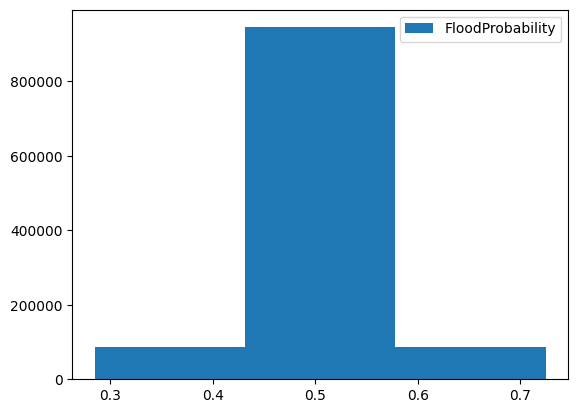

In [13]:
# Observando graficamente a variável target
treino["FloodProbability"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "FloodProbability", bins = 3);

In [14]:
# Observando valores duplicados
treino.duplicated().sum()

0

In [15]:
# Calculando a dispersão dos dados
sparsity = 1 - count_nonzero(treino) / treino.size
print("A dispersão do dataframe é: " + str(round(sparsity, 2)) + ".")

A dispersão do dataframe é: 0.0.


In [16]:
# Confirmando
sparse.issparse(treino)

False

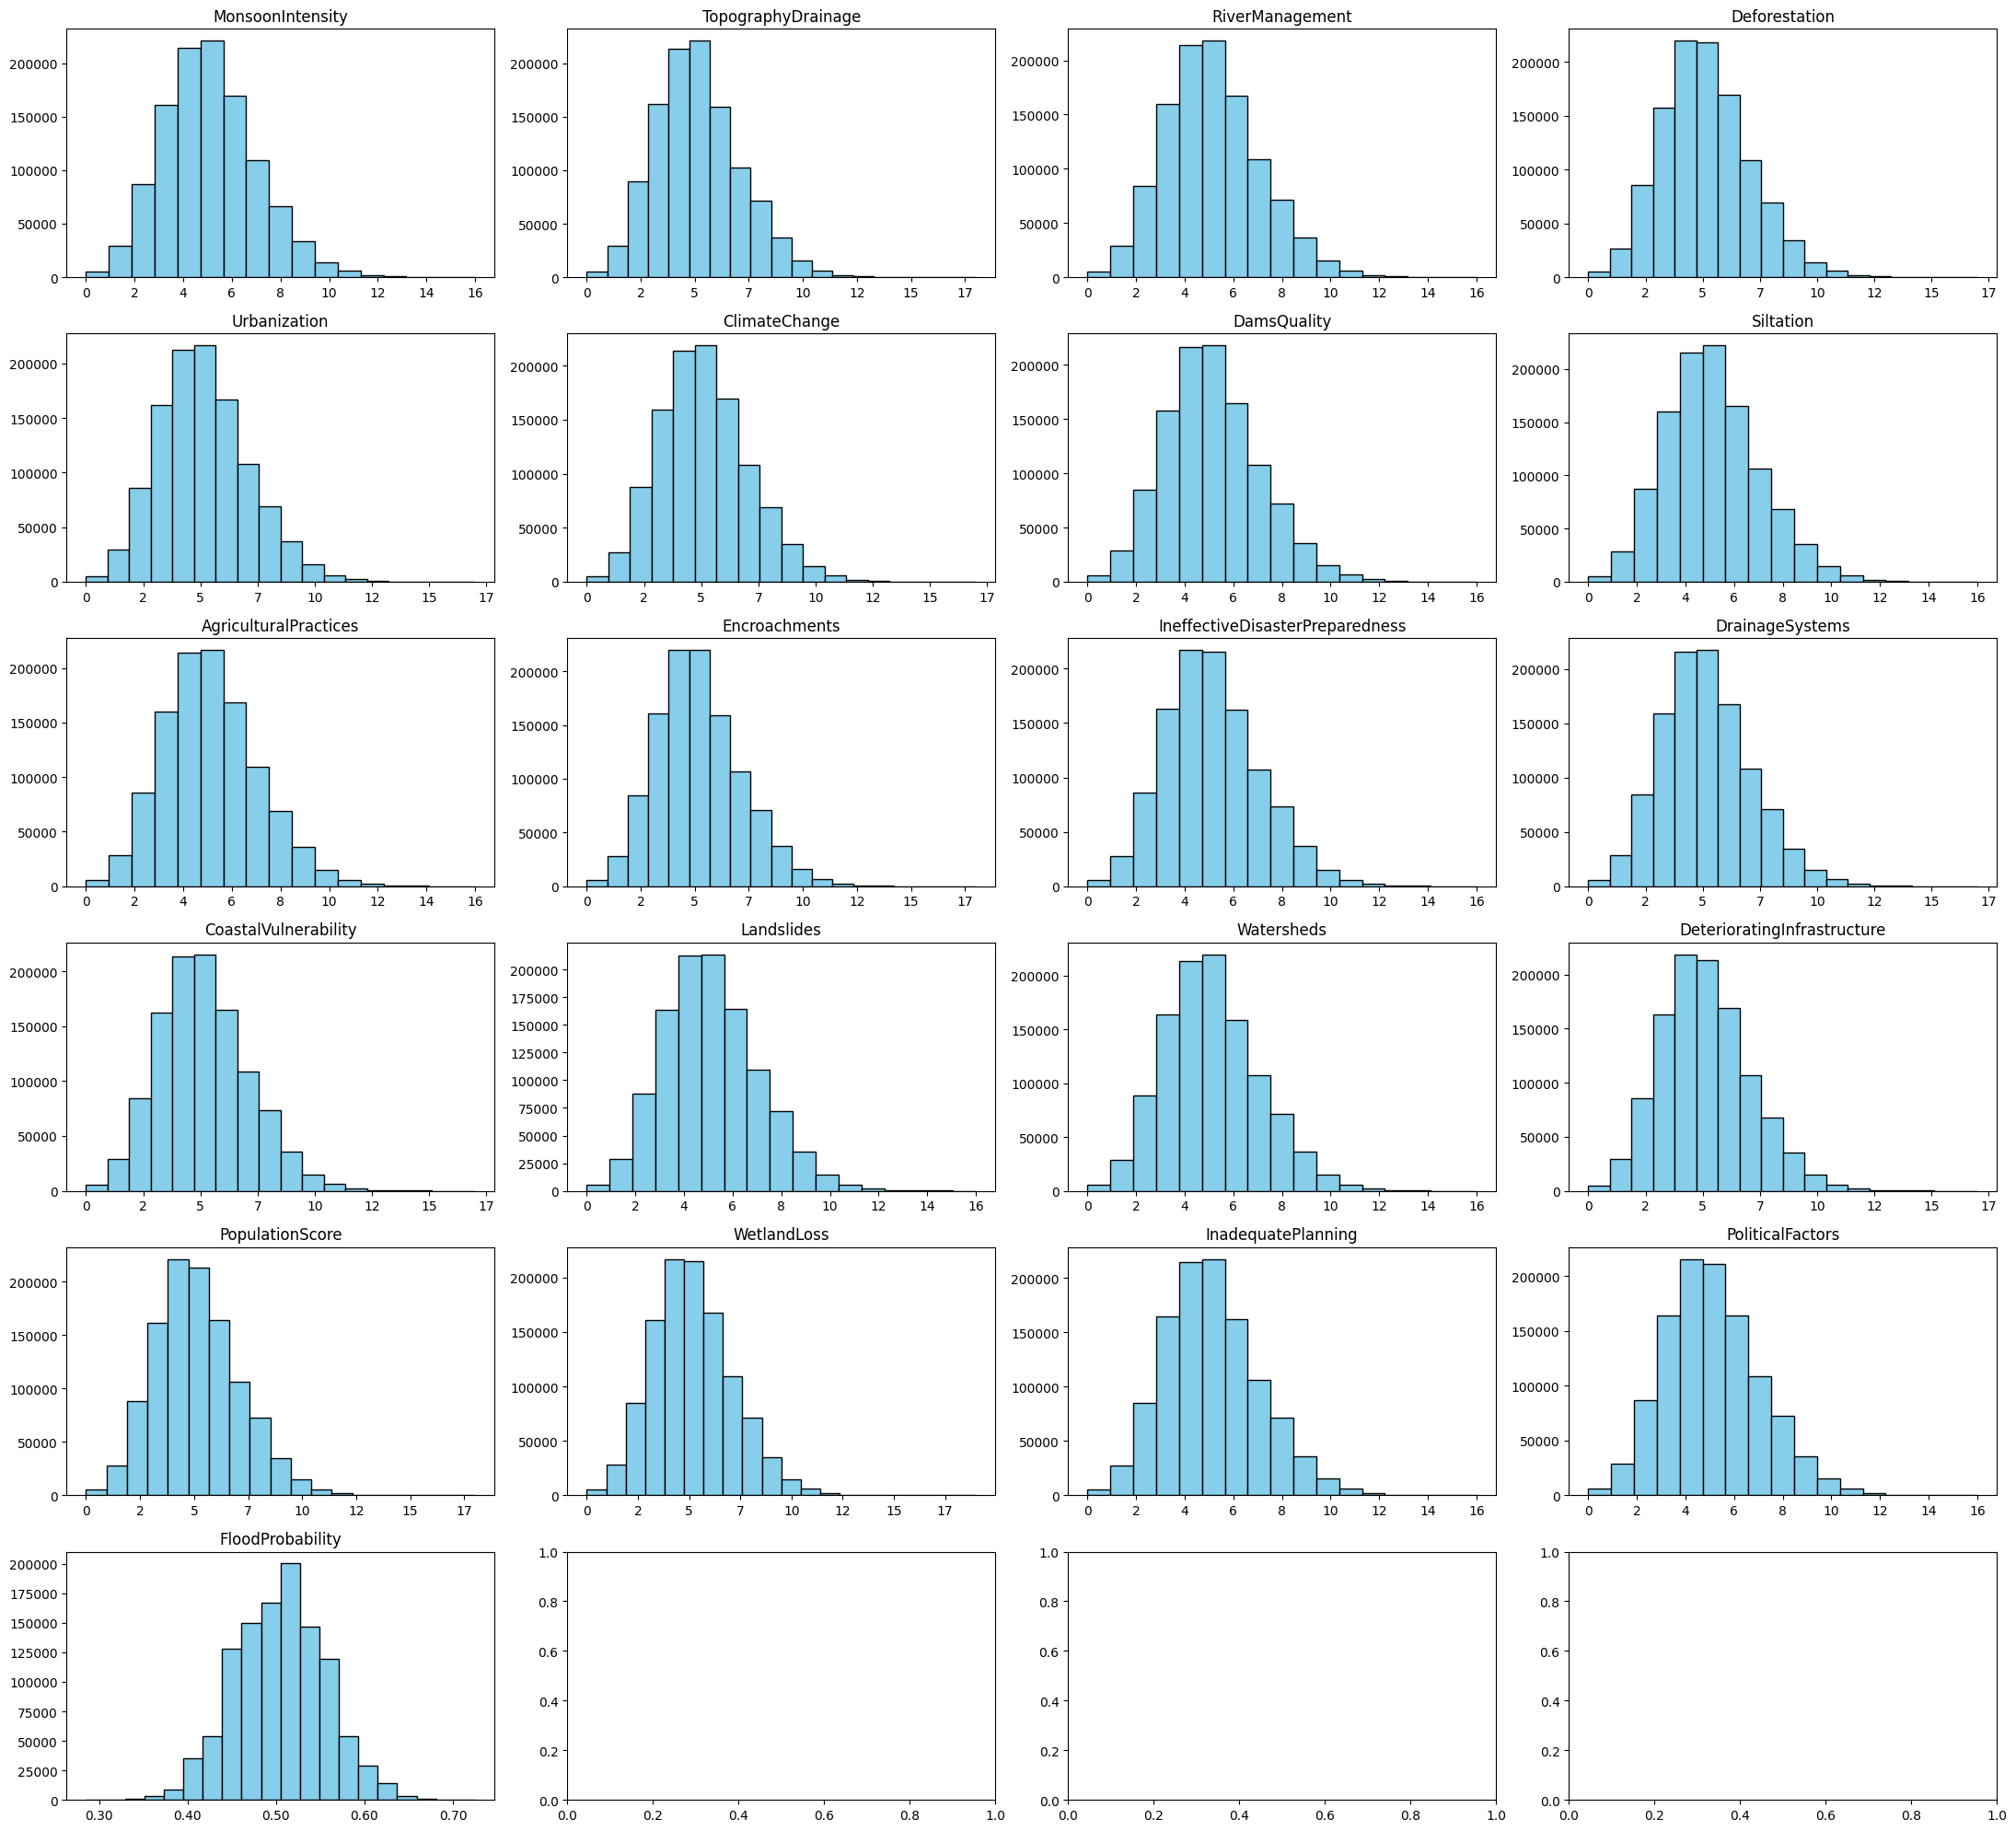

In [20]:
fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(22, 20))
axs_flatten = axs.flatten()
for index, (k, v) in enumerate(treino.items()):
    bins = min(len(set(v)), 20)
    axs_flatten[index].hist(v, bins=bins, color='skyblue', edgecolor='black')
    axs_flatten[index].set_title(k)

    if np.issubdtype(v.dtype, np.integer):
        axs_flatten[index].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
    elif np.issubdtype(v.dtype, np.floating):
        axs_flatten[index].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))

plt.tight_layout()
plt.show()

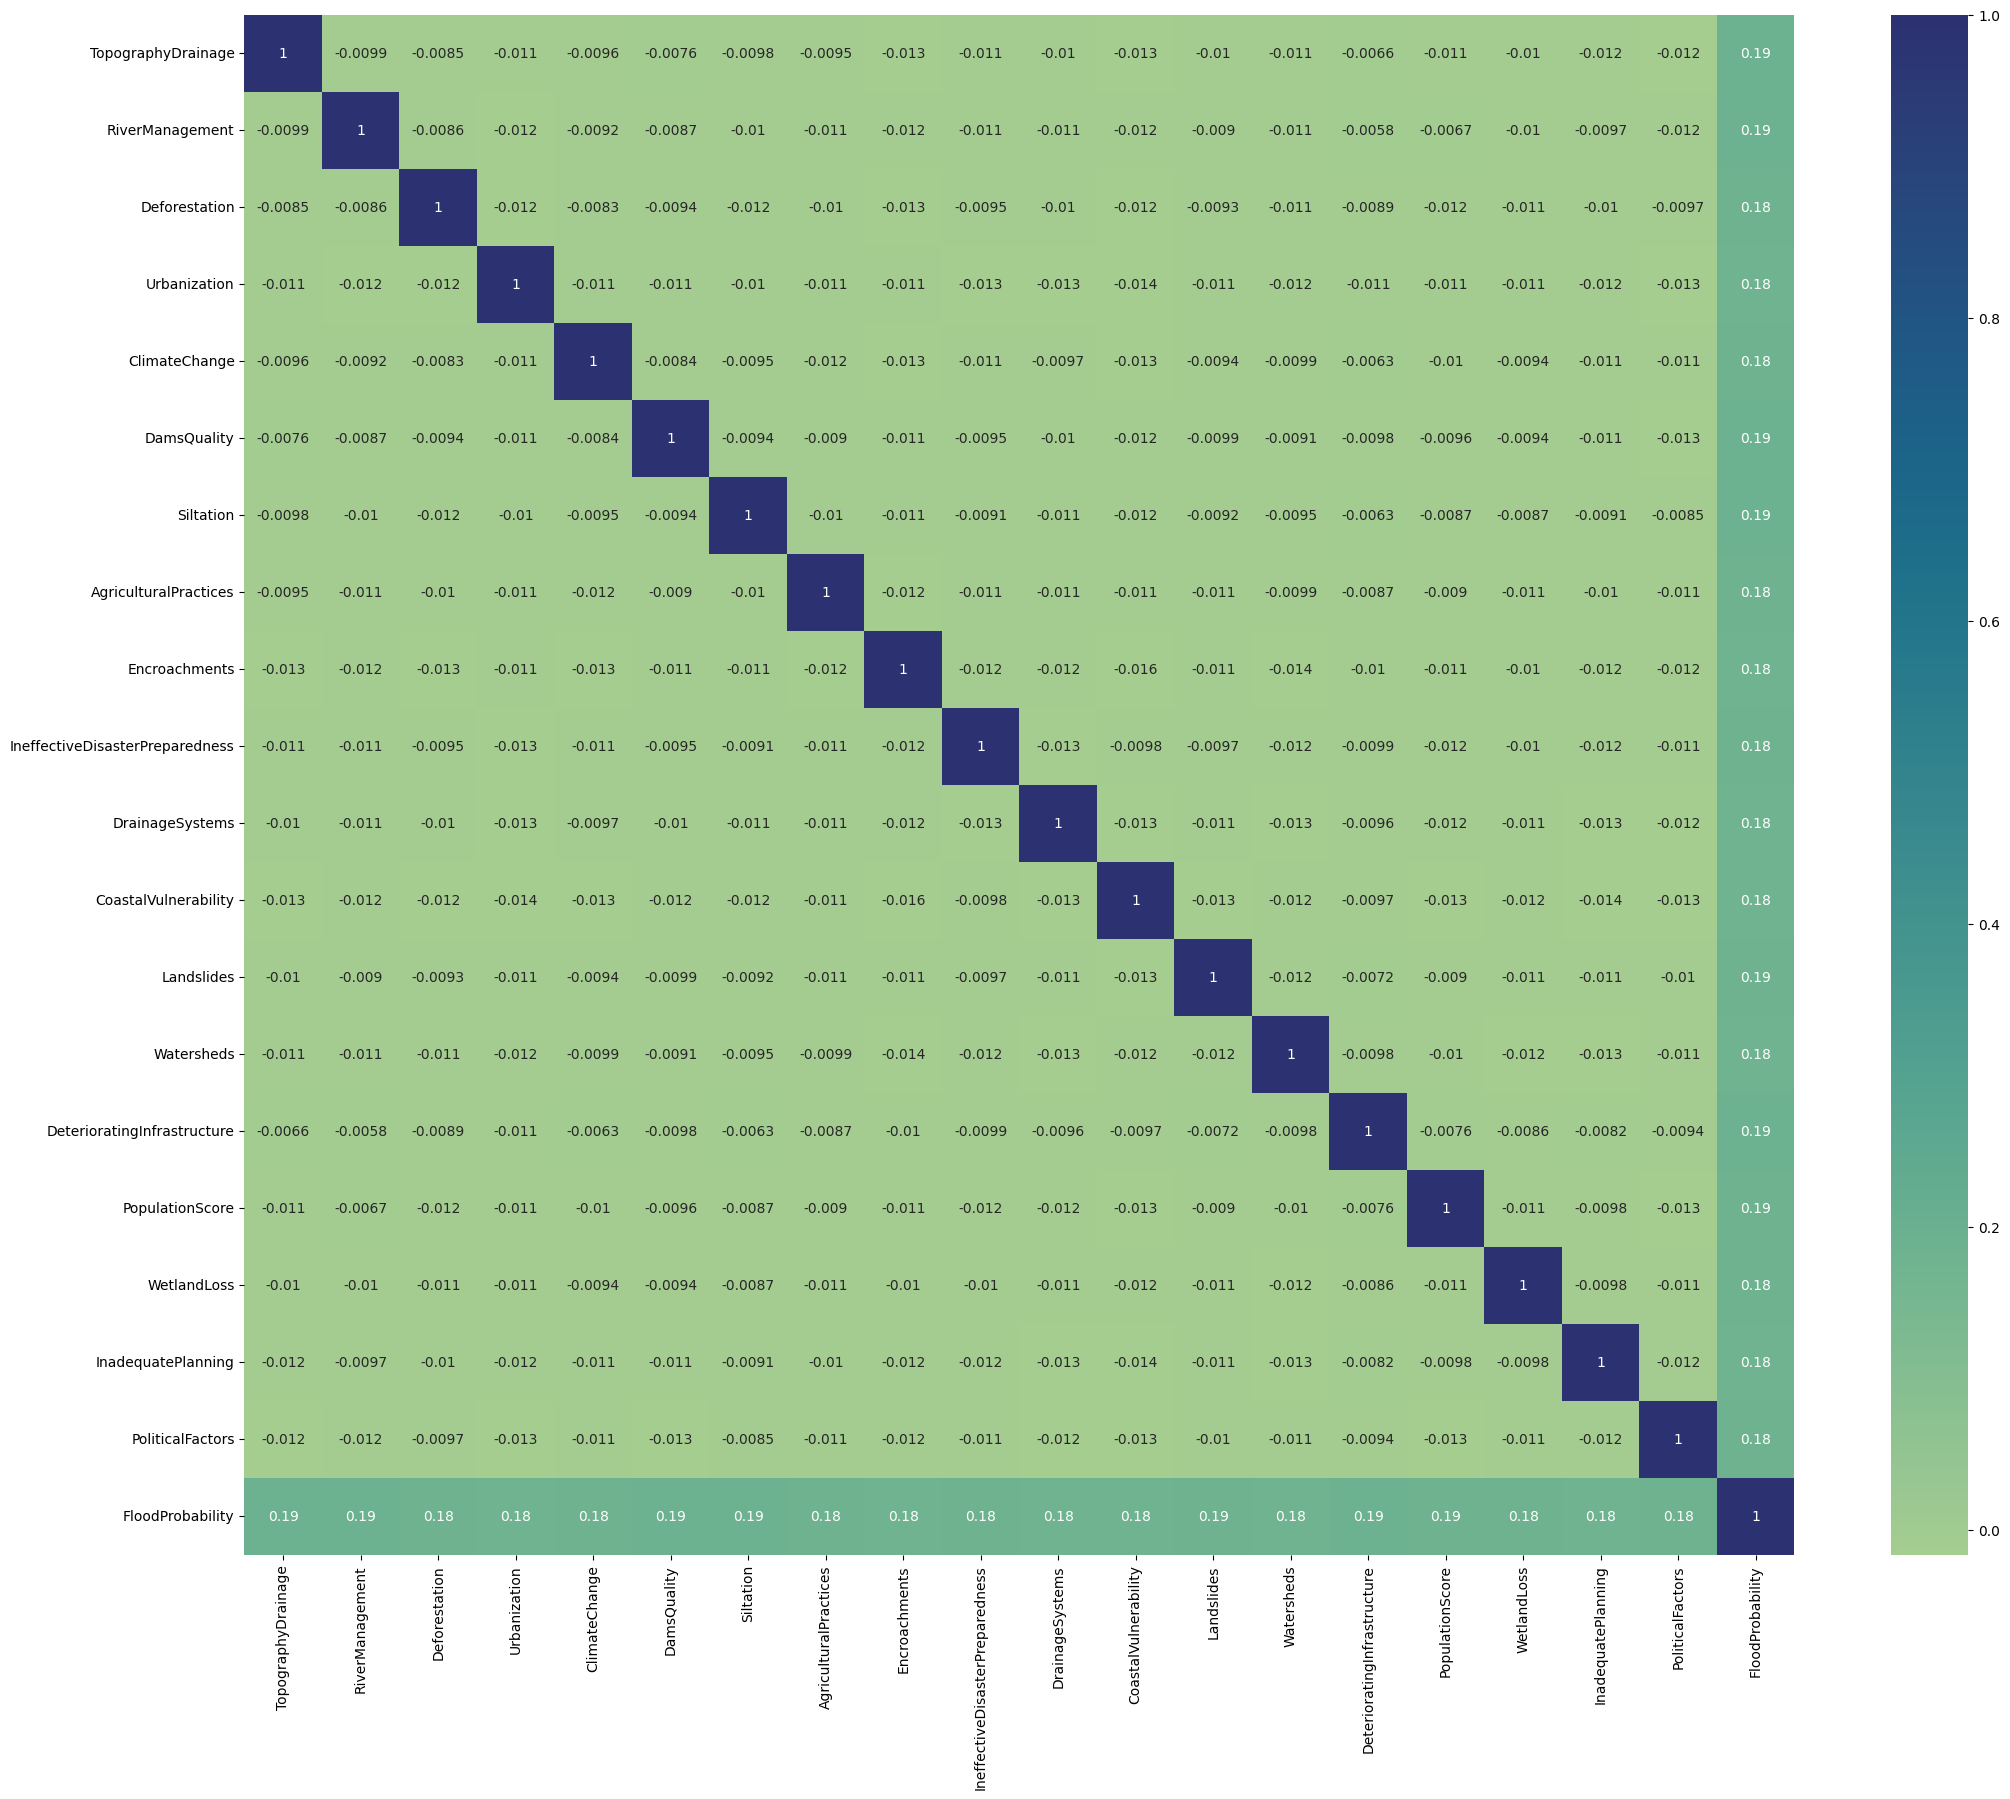

In [21]:
plt.figure(figsize=(25,20))
sns.heatmap(treino.iloc[:,1:].corr(),cmap="crest",annot=True);

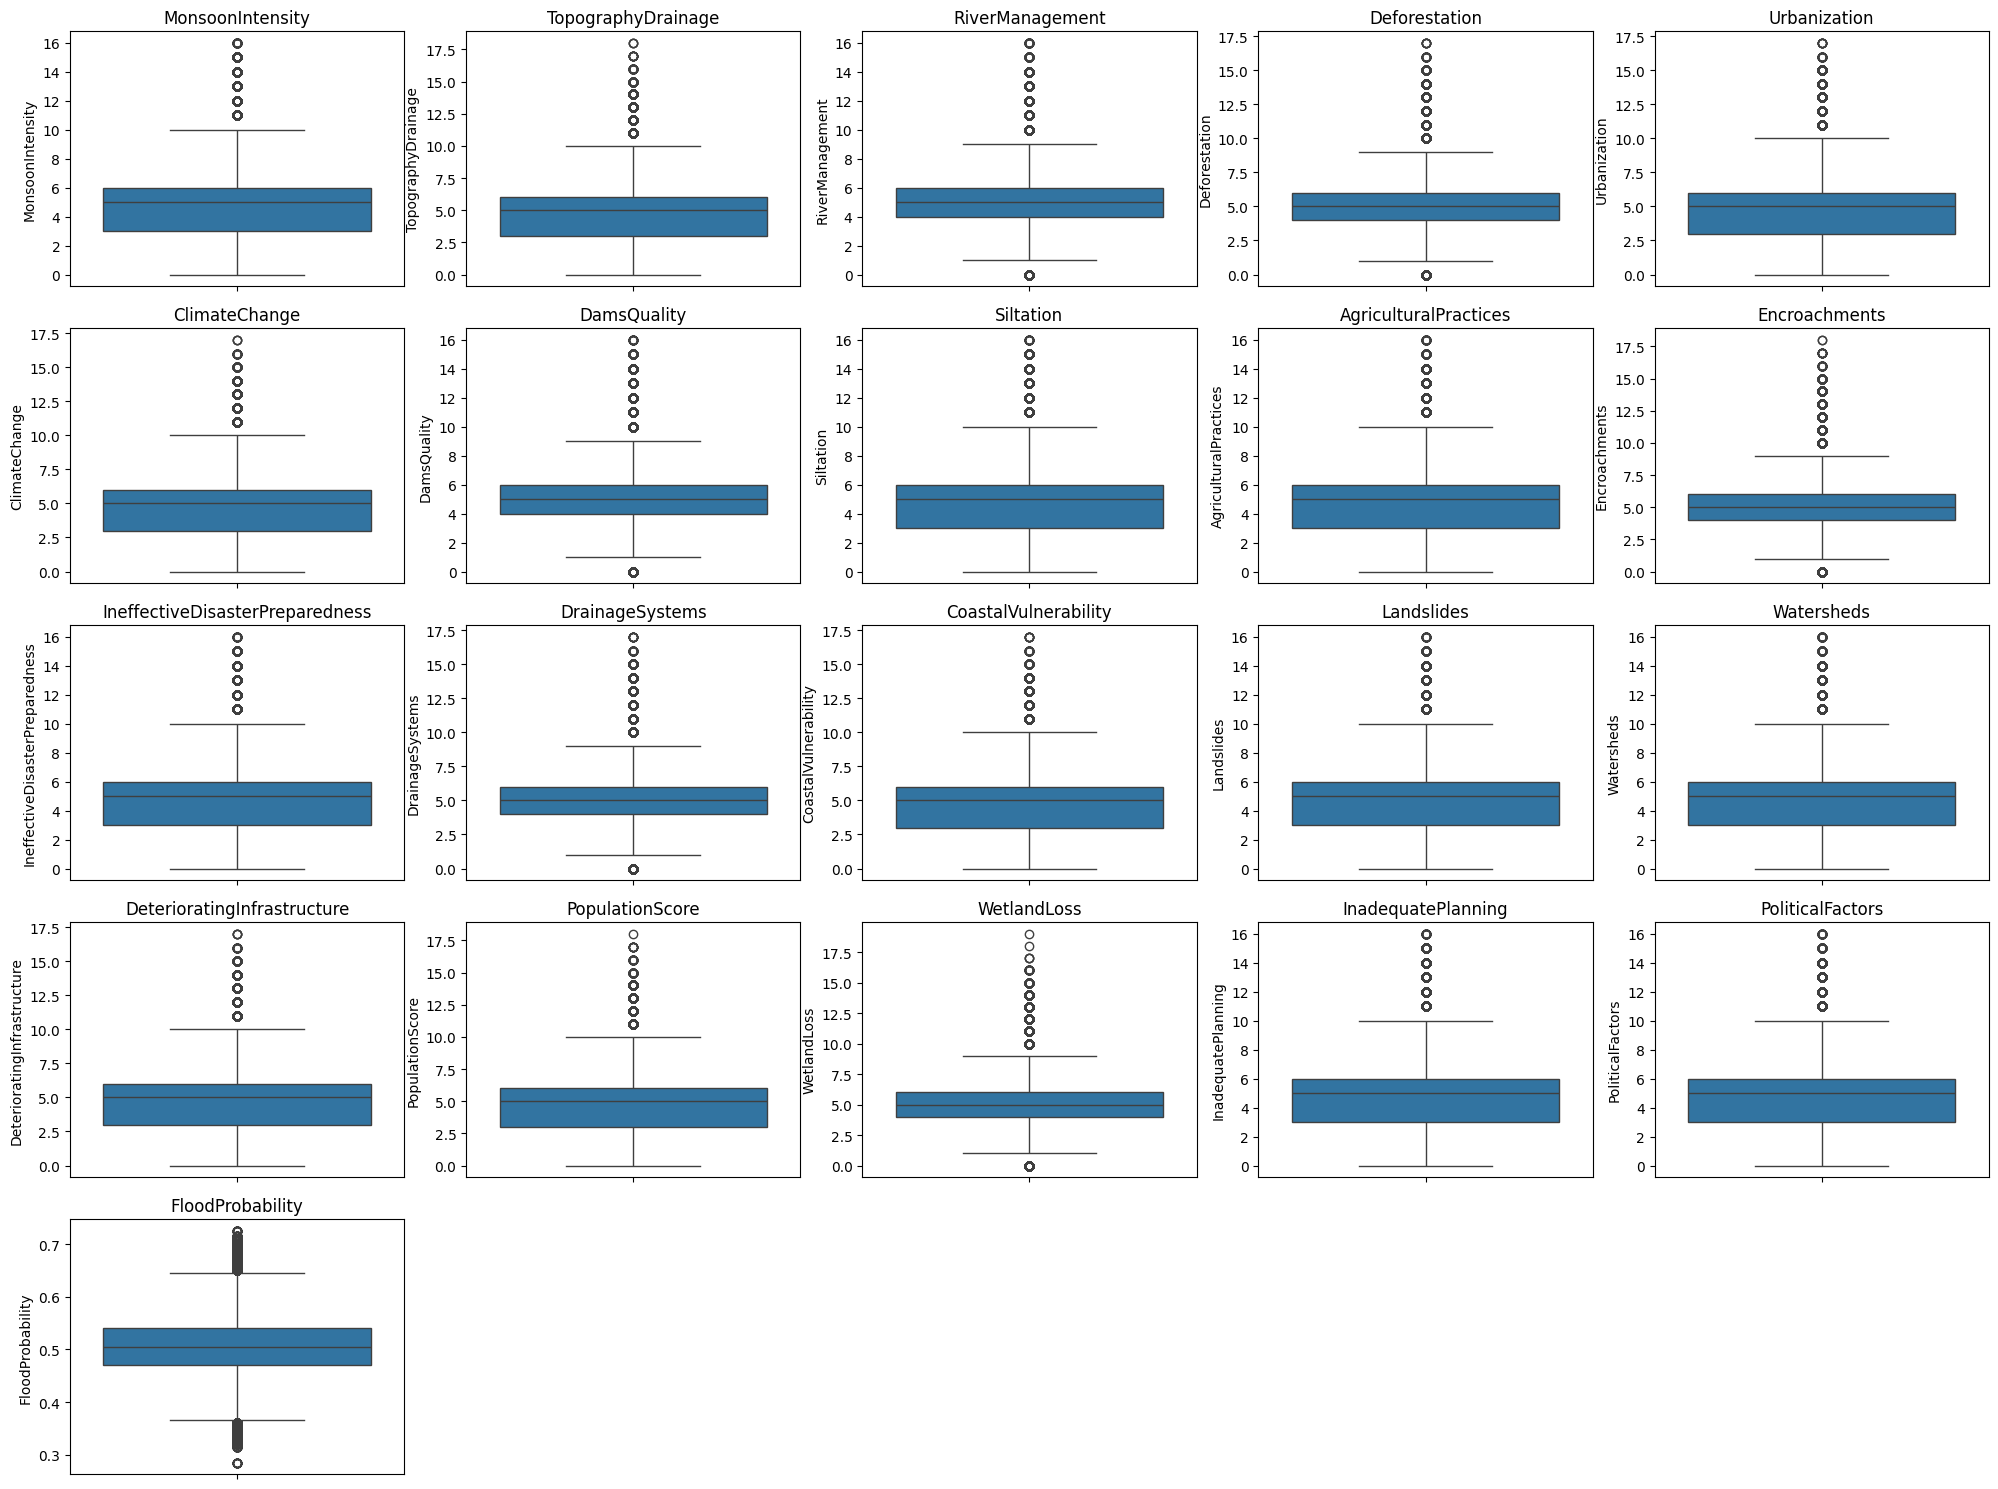

In [22]:
# Boxplot para observar a existência de outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(treino.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=treino[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [23]:
# Função para remover os outliers
def remover_outlier(in_data, in_col):

    primeiro_quartil = in_data[in_col].quantile(0.25)
    terceiro_quartil = in_data[in_col].quantile(0.75)
    iqr = terceiro_quartil - primeiro_quartil
    upper_limit = terceiro_quartil + 1.5 * iqr
    lower_limit = primeiro_quartil - 1.5 * iqr

    in_data.loc[(in_data[in_col]>upper_limit), in_col] = upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col] = lower_limit
    return in_data

In [24]:
# Substituindo os outliers pelos limites max e min
columns = treino.columns
for col in columns:
    treino = remover_outlier(treino, col)

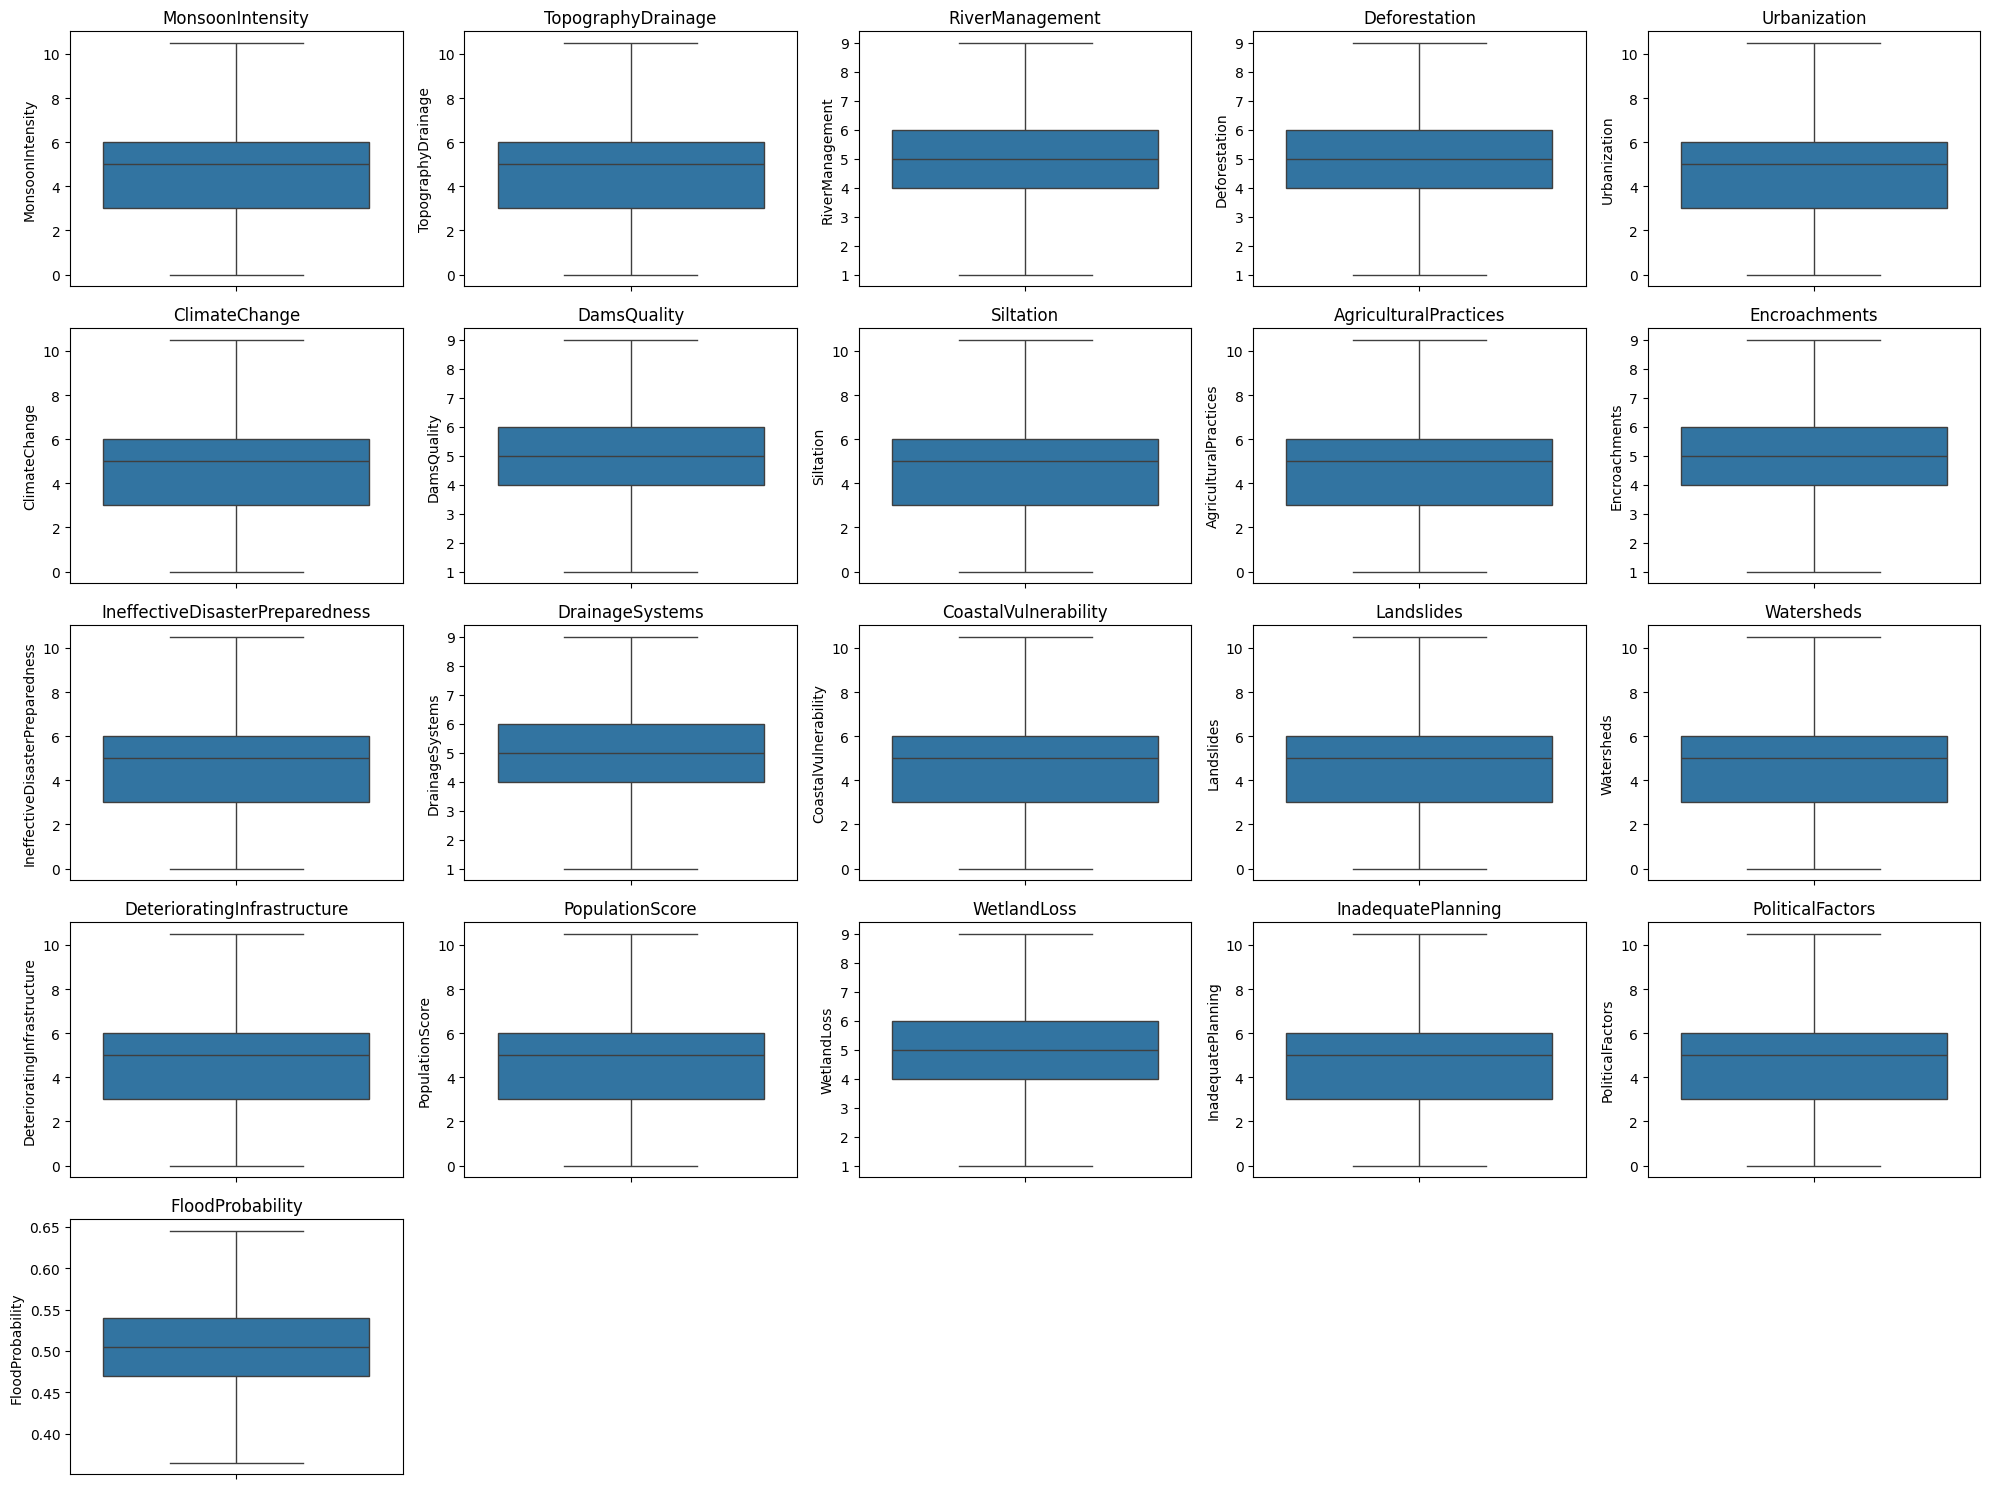

In [25]:
# Observando as correções
plt.figure(figsize=(20, 15))
for i, column in enumerate(treino.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=treino[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [26]:
# Calculando assimetria de cada variável
assimetria = treino.skew().sort_values(ascending=False)
assimetria

TopographyDrainage                 0.357657
InadequatePlanning                 0.353102
PopulationScore                    0.348890
Watersheds                         0.347633
DeterioratingInfrastructure        0.346636
IneffectiveDisasterPreparedness    0.346052
Siltation                          0.345395
PoliticalFactors                   0.340068
Urbanization                       0.338730
CoastalVulnerability               0.334445
MonsoonIntensity                   0.332893
ClimateChange                      0.331956
Landslides                         0.328739
AgriculturalPractices              0.326722
Encroachments                      0.242676
WetlandLoss                        0.219887
Deforestation                      0.219212
DamsQuality                        0.218259
RiverManagement                    0.214323
DrainageSystems                    0.214063
FloodProbability                   0.038884
dtype: float64

In [27]:
# Criando a variável target
target = treino['FloodProbability']

In [28]:
# Dropando a variável que não serve
preditoras = treino.drop(['FloodProbability'], axis=1)

In [29]:
preditoras.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5.0,8.0,5,8,6.0,4.0,4,3.0,3.0,4,2.0,5,3.0,3.0,5.0,4.0,7.0,5,7.0,3.0
1,6.0,7.0,4,4,8.0,8.0,3,5.0,4.0,6,9.0,7,2.0,0.0,3.0,5.0,3.0,3,4.0,3.0
2,6.0,5.0,6,7,3.0,7.0,1,5.0,4.0,5,6.0,7,3.0,7.0,5.0,6.0,8.0,2,3.0,3.0
3,3.0,4.0,6,5,4.0,8.0,4,7.0,6.0,8,5.0,2,4.0,7.0,4.0,4.0,6.0,5,7.0,5.0
4,5.0,3.0,2,6,4.0,4.0,3,3.0,3.0,3,5.0,2,2.0,6.0,6.0,4.0,1.0,2,3.0,5.0


In [30]:
target

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [31]:
target.shape

(1117957,)

In [32]:
preditoras.shape

(1117957, 20)

In [33]:
# Divisão em Dados de Treino e Teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.25)

In [34]:
# Padronização das Variáveis
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler()
x_treino_padronizado = padronizador.fit_transform(x_treino)
x_teste_padronizado = padronizador.transform(x_teste)

In [35]:
# Instalando as bibliotecas para os modelos de machine learning
!pip install catboost
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [36]:
# Inicializando os modelos de regressão
models = {
    'Ridge Regression': Ridge(),
    'SVR': SVR(),
    'XGBR': XGBRegressor(positive=True),
    'Random Forest Regression': RandomForestRegressor(),
    'CatBoost Regression': CatBoostRegressor(silent=True)
}

In [37]:
# Iniciando validação cruzada
k_folds = KFold(n_splits=5, shuffle=True)

In [39]:
for name, model in models.items():
    print(f"Model: {name}")

    # Calcula o Score
    r2_scores = cross_val_score(model, x_treino_padronizado, y_treino, cv=k_folds, scoring='r2')

    # Printa a pontuação
    print("R^2 scores:", r2_scores)

    # Calcula e imprime a media
    avg_r2 = np.mean(r2_scores)
    print("Average R^2:", avg_r2)
    print()

Model: Ridge Regression
R^2 scores: [0.83677285 0.83668955 0.83732607 0.83602064 0.83755147]
Average R^2: 0.8368721186078145

Model: SVR
R^2 scores: [0.63267435 0.6435401  0.6502065  0.64723871 0.62740131]
Average R^2: 0.6402121937109326

Model: XGBR
R^2 scores: [0.80493463 0.80109466 0.80169542 0.80403901 0.80169981]
Average R^2: 0.8026927053796473

Model: Random Forest Regression
R^2 scores: [0.65125699 0.65085729 0.65158541 0.64830893 0.65058122]
Average R^2: 0.6505179693256327

Model: CatBoost Regression
R^2 scores: [0.84165583 0.84043267 0.84047226 0.84072273 0.84130329]
Average R^2: 0.840917357757818



In [40]:
# Selecionando o modelo que se saiu melhor
model = CatBoostRegressor()

In [41]:
# Definindo os parâmetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [42]:
# Ajustando os hiperparâmetros de forma sistemática
best_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [43]:
# Iniciando o treinamento
best_model.fit(x_treino_padronizado, y_treino)
print("Melhores parâmetros encontrados: ", best_model.best_params_)
print("Melhor score encontrado: ", best_model.best_score_)

A saída de streaming foi truncada nas últimas 5000 linhas.
102:	learn: 0.0412201	total: 29.5s	remaining: 56.4s
103:	learn: 0.0411495	total: 29.7s	remaining: 56s
104:	learn: 0.0410798	total: 29.9s	remaining: 55.6s
105:	learn: 0.0410102	total: 30.2s	remaining: 55.2s
106:	learn: 0.0409403	total: 30.4s	remaining: 54.8s
107:	learn: 0.0408709	total: 30.6s	remaining: 54.4s
108:	learn: 0.0408014	total: 30.9s	remaining: 54.1s
109:	learn: 0.0407324	total: 31.1s	remaining: 53.7s
110:	learn: 0.0406635	total: 31.3s	remaining: 53.3s
111:	learn: 0.0405951	total: 31.5s	remaining: 52.9s
112:	learn: 0.0405274	total: 31.8s	remaining: 52.6s
113:	learn: 0.0404594	total: 32s	remaining: 52.2s
114:	learn: 0.0403915	total: 32.2s	remaining: 51.8s
115:	learn: 0.0403246	total: 32.4s	remaining: 51.4s
116:	learn: 0.0402577	total: 32.7s	remaining: 51.1s
117:	learn: 0.0401906	total: 32.9s	remaining: 50.8s
118:	learn: 0.0401238	total: 33.1s	remaining: 50.4s
119:	learn: 0.0400575	total: 33.4s	remaining: 50s
120:	learn:

In [44]:
# Variável para fazer as previsões do modelo ajustado
y_pred = best_model.predict(x_teste_padronizado)

In [45]:
y_pred

array([0.54393587, 0.53466572, 0.50801368, ..., 0.50760932, 0.4981716 ,
       0.53588202])

In [46]:
y_teste

672831     0.555
310294     0.525
1081423    0.515
135130     0.470
761353     0.440
           ...  
35783      0.430
539038     0.540
703971     0.505
252270     0.530
124        0.520
Name: FloodProbability, Length: 279490, dtype: float64

In [47]:
# Transformando as previsões em uma série do pandas e combinando os dataframes idvar e test_predictions
teste_predictions = pd.Series(y_pred, name="FloodProbability")
inund = pd.concat([idvar, teste_predictions], axis = 1)
inund.to_csv('submission.csv', index=False)

In [50]:
# Observando o resultado final
inund.head(10)

,id,FloodProbability
0,1117957,0.543936
1,1117958,0.534666
2,1117959,0.508014
3,1117960,0.484482
4,1117961,0.449511
5,1117962,0.545502
6,1117963,0.496444
7,1117964,0.583286
8,1117965,0.501880
9,1117966,0.593436
